# Filtrando outliers - dataset Boston Houses

A lo largo de este notebook vamos a ver como filtrar outliers utilizando el concepto de z-score. 

Lo que hace z-score es buscar la distribución de los datos donde la media es 0 y el desvío estandar es 1, es decir, una distribución normal. Esto lo hace analizando como se relaciona cada punto en los datos con el desvío estandar y la media. 

En pocas palabras, es una forma de reescalar los datos para que tengan la forma de una distribución conocida. 

Si asignas un umbral en los valores devueltos por z-score, a partir del cual consideramos los datos como outliers, podemos hacer un filtrado.

En este notebook analizaremos la variable `PTRATIO` que indica el porcentaje de docentes por alumno. 


In [8]:
%matplotlib inline
from sklearn import datasets
import pandas as pd

boston = datasets.load_boston()
x = boston.data
y = boston.target
columns = boston.feature_names

# Creamos el dataframe con los datos de boston houses
boston_df = pd.DataFrame(boston.data)
boston_df.columns = columns
boston_df.head()

ModuleNotFoundError: No module named 'matplotlib'

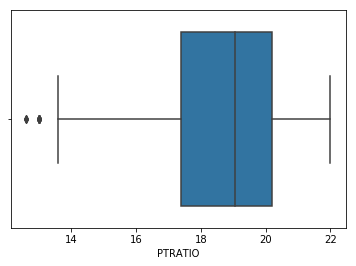

In [93]:
import seaborn as sns
# Graficamos en un boxplot el porcentaje de docentes por estudiante
sns.boxplot(x=boston_df['PTRATIO'])

En este boxplot podemos apreciar la presencia de outlier. Es por eso que vamos a analizar el dataset utilizando z-score.

In [5]:
# Calculamos el z-score de la columna PTRATIO
from scipy import stats
import numpy as np
z = stats.zscore(boston_df.PTRATIO)
print(z)

ModuleNotFoundError: No module named 'scipy'

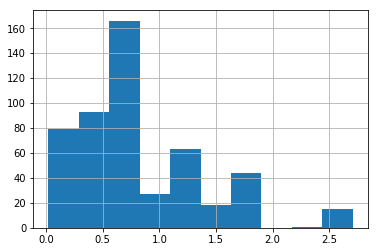

In [96]:
# Hacemos un histograma de los valores absolutos de z (es decir, todos valores positivos)
pd.Series.hist(pd.Series(np.abs(z)))

In [97]:
# Vamos a definir un umbral (threshold) a partir de 2.0 y filtrar lo que se encuentre con
# un z-score sobre él.
threshold = 2
print(np.where(np.abs(z) > threshold))

(array([196, 197, 198, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266,
       267, 268, 283]),)


In [98]:
# Ahora nos vamos a quedar únicamente con los valores dentro del umbral
ptratio_filtered = boston_df.PTRATIO[np.abs(z) < threshold]

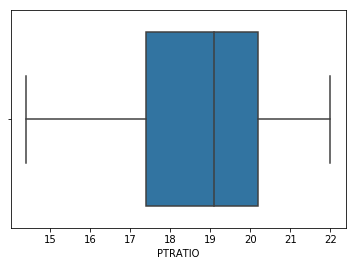

In [99]:
# Graficamos en un boxplot el porcentaje de docentes por estudiante
sns.boxplot(x=ptratio_filtered)